In [13]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [3]:
%matplotlib inline

In [5]:
iris_data = load_iris()

In [8]:
data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# append the target column to the data
data["target"] = iris_data.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
# lets plot the features of 3 classes, lets first divide the data with their class respectively
df0 = data[data.target == 0]
df1 = data[data.target == 1]
df2 = data[data.target == 2]

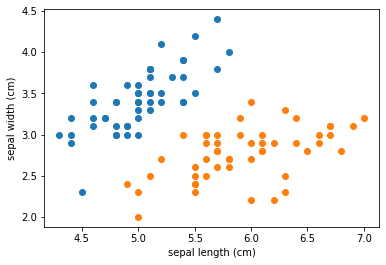

In [14]:
# lets plot the sepal lenght vs sepal width for the first two classes
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'])

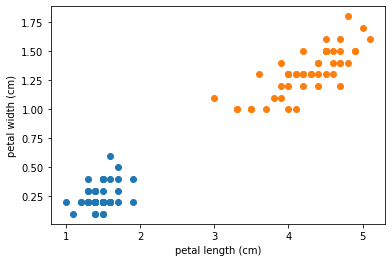

In [15]:
# we can easily use the SVM to plot a hyperplane between the two classes
# now lets see for petal lenght vs petal width
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])

In [20]:
# in this too, we can plot the hyperplane easily
# lets move to the model fitting now....

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop("target", axis=1), data.target, test_size=0.2)

In [21]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
108,6.7,2.5,5.8,1.8
97,6.2,2.9,4.3,1.3
46,5.1,3.8,1.6,0.2
57,4.9,2.4,3.3,1.0
21,5.1,3.7,1.5,0.4


In [22]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

SVC()

In [23]:
model.score(X_test, y_test)

0.9666666666666667

In [32]:
# lets try this for another value of regularization
# we can try similarly for gamma

model = SVC(C=0.1, gamma=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8333333333333334

similarly we can use different values for different parameters to tune our model and also use the cross validation to get better accuracy